## Import Data and Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [18]:
file = 'murder_project.csv'
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751785 entries, 0 to 751784
Data columns (total 32 columns):
ID              751785 non-null object
CNTYFIPS        751785 non-null object
Ori             751785 non-null object
State           751785 non-null object
Agency          751785 non-null object
Agentype        751785 non-null object
Source          751785 non-null object
Solved          751785 non-null object
Year            751785 non-null int64
StateName       751785 non-null object
Month           751785 non-null object
Incident        751785 non-null int64
ActionType      751785 non-null object
Homicide        751785 non-null object
Situation       751785 non-null object
VicAge          751785 non-null object
VicSex          751785 non-null object
VicRace         751785 non-null object
VicEthnic       751785 non-null object
OffAge          751785 non-null object
OffSex          751785 non-null object
OffRace         751785 non-null object
OffEthnic       751785 non-null o

## Basic Exploration  
Shape and content of our features

In [3]:
df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,ALASKA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,Unknown or not reported,55,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,ALA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,ALA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,ALA,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,Male,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,ALA,January,1,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,Male,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180,Alabama,"Mobile, AL"


In [ ]:
#look for categorical vars
potential = []
for col in df.columns.values:
    if len(set(df[col])) < 50:
        print(col, set(df[col]))
        potential.append(col)
        
print(potential)

In [4]:
catagorical = ['Agentype', 'Source', 'Solved', 'Homicide', 'Situation', 'VicSex',
               'VicRace', 'VicEthnic', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon',
               'Relationship', 'Circumstance', 'SubCircum']

numeric = ['Year', 'VicCount', 'OffCount']

In [12]:
#how many homicides? ie not negligent manslaughter
print('Homocide:', df[df.Homicide == 'Murder and non-negligent manslaughter'].ID.count())
print('Negligent manslaughter:', df[df.Homicide != 'Murder and non-negligent manslaughter'].ID.count())

Homocide: 741174
Negligent manslaughter: 10611


In [13]:
#how many unsolved cases?
print('Unsolved:', df[df.Solved == 'No'].ID.count())
print('Solved:', df[df.Solved == 'Yes'].ID.count())

Unsolved: 220602
Solved: 531183


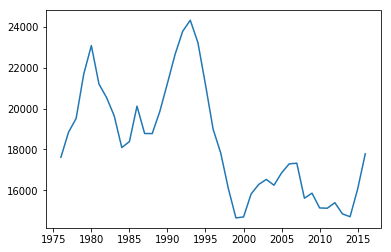

In [26]:
df.Year = pd.to_numeric(df.Year)
df.Year.value_counts().sort_index().plot()